# Toyota Corolla Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\ToyotaCorolla.csv")
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [3]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [6]:
df.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [7]:
df.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [8]:
x=df[["KM","Age_08_04","Mfg_Month","Mfg_Month","HP","Met_Color","Automatic","cc","Doors","Gears","Quarterly_Tax","Weight","Mfr_Guarantee","BOVAG_Guarantee","Guarantee_Period","ABS","Airbag_1","Airbag_2","Automatic_airco","Boardcomputer","CD_Player","Central_Lock","Powered_Windows","Power_Steering","Radio","Mistlamps","Mistlamps","Backseat_Divider","Metallic_Rim","Radio_cassette","Tow_Bar"]]
y=df["Price"]

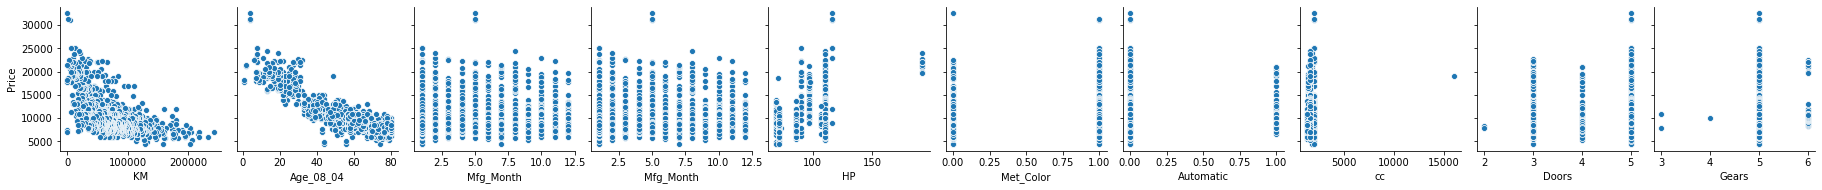

In [9]:
sns.pairplot(data=df,x_vars=["KM","Age_08_04","Mfg_Month","Mfg_Month","HP","Met_Color","Automatic","cc","Doors","Gears"],y_vars="Price")

## model building Steps

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
lin_model=LinearRegression()
lin_model.fit(xtrain,ytrain)
lin_model.score(xtrain,ytrain)

0.9144726801986102

In [11]:
lin_model.score(xtest,ytest)

0.6318080333831071

In [12]:
ypred=lin_model.predict(xtest)

In [13]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
1327,8950,7244.462304
1098,8450,7382.528236
1396,9800,8823.453269
21,16950,18481.542433
1014,10450,10974.627783
...,...,...
1387,7450,8993.147571
688,8950,8422.397315
4,13750,16026.545101
108,17950,17091.074891


In [14]:
residual=ytest-ypred
residual

1327    1705.537696
1098    1067.471764
1396     976.546731
21     -1531.542433
1014    -524.627783
           ...     
1387   -1543.147571
688      527.602685
4      -2276.545101
108      858.925109
1193    -119.894576
Name: Price, Length: 431, dtype: float64

In [15]:
np.mean(residual)

90.75484895863285

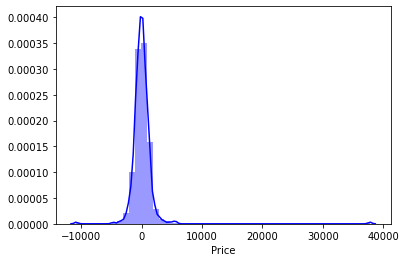

In [16]:
sns.distplot(residual,kde=True,color="b")

In [17]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
s=StandardScaler()
X_scale=s.fit_transform(x)
lin_model.fit(X_scale,y)
lin_model.score(X_scale,y)

0.904164422696657

In [18]:
m=MinMaxScaler()
X_sc=s.fit_transform(x)
lin_model.fit(X_sc,y)
lin_model.score(X_sc,y)

0.904164422696657

## Removing Outlier

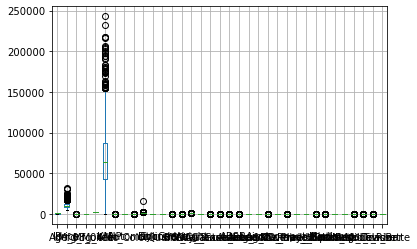

In [19]:
df.boxplot()

In [20]:
# IQR--> Q3-Q1     Q--> quantile
# IQR ---> interquartile range
# range -- Q1-1.5*IQR to Q3+1.5*IQR

In [21]:
a=df[["KM","Age_08_04","Mfg_Month","Mfg_Month","HP","Met_Color","Automatic","cc","Doors","Gears","Quarterly_Tax","Weight","Mfr_Guarantee","BOVAG_Guarantee","Guarantee_Period","ABS","Airbag_1","Airbag_2","Automatic_airco","Boardcomputer","CD_Player","Central_Lock","Powered_Windows","Power_Steering","Radio","Mistlamps","Mistlamps","Backseat_Divider","Metallic_Rim","Radio_cassette","Tow_Bar"]]
a

,KM,Age_08_04,Mfg_Month,Mfg_Month,HP,Met_Color,Automatic,cc,Doors,Gears,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Mistlamps,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,46986,23,10,10,90,1,0,2000,3,5,...,1,1,1,0,0,0,1,0,0,0
1,72937,23,10,10,90,1,0,2000,3,5,...,1,0,1,0,0,0,1,0,0,0
2,41711,24,9,9,90,1,0,2000,3,5,...,0,0,1,0,0,0,1,0,0,0
3,48000,26,7,7,90,0,0,2000,3,5,...,0,0,1,0,0,0,1,0,0,0
4,38500,30,3,3,90,0,0,2000,3,5,...,1,1,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,20544,69,12,12,86,1,0,1300,3,5,...,1,1,1,0,1,1,1,0,0,0
1432,19000,72,9,9,86,0,0,1300,3,5,...,0,0,1,0,0,0,1,0,0,0
1433,17016,71,10,10,86,0,0,1300,3,5,...,0,0,1,0,0,0,1,0,0,0
1434,16916,70,11,11,86,1,0,1300,3,5,...,0,0,0,0,0,0,1,0,0,0


In [22]:
Q1=a.quantile(0.25)
Q1

KM                  43000.0
Age_08_04              44.0
Mfg_Month               3.0
Mfg_Month               3.0
HP                     90.0
Met_Color               0.0
Automatic               0.0
cc                   1400.0
Doors                   3.0
Gears                   5.0
Quarterly_Tax          69.0
Weight               1040.0
Mfr_Guarantee           0.0
BOVAG_Guarantee         1.0
Guarantee_Period        3.0
ABS                     1.0
Airbag_1                1.0
Airbag_2                0.0
Automatic_airco         0.0
Boardcomputer           0.0
CD_Player               0.0
Central_Lock            0.0
Powered_Windows         0.0
Power_Steering          1.0
Radio                   0.0
Mistlamps               0.0
Mistlamps               0.0
Backseat_Divider        1.0
Metallic_Rim            0.0
Radio_cassette          0.0
Tow_Bar                 0.0
Name: 0.25, dtype: float64

In [23]:
Q3=a.quantile(0.75)
Q3

KM                  87020.75
Age_08_04              70.00
Mfg_Month               8.00
Mfg_Month               8.00
HP                    110.00
Met_Color               1.00
Automatic               0.00
cc                   1600.00
Doors                   5.00
Gears                   5.00
Quarterly_Tax          85.00
Weight               1085.00
Mfr_Guarantee           1.00
BOVAG_Guarantee         1.00
Guarantee_Period        3.00
ABS                     1.00
Airbag_1                1.00
Airbag_2                1.00
Automatic_airco         0.00
Boardcomputer           1.00
CD_Player               0.00
Central_Lock            1.00
Powered_Windows         1.00
Power_Steering          1.00
Radio                   0.00
Mistlamps               1.00
Mistlamps               1.00
Backseat_Divider        1.00
Metallic_Rim            0.00
Radio_cassette          0.00
Tow_Bar                 1.00
Name: 0.75, dtype: float64

In [24]:
IQR=Q3-Q1

In [25]:
(a<Q1-IQR*1.5) | (a>Q3+IQR*1.5)

,KM,Age_08_04,Mfg_Month,Mfg_Month,HP,Met_Color,Automatic,cc,Doors,Gears,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Mistlamps,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [26]:
new_df=a[~((a<Q1-IQR*1.5) | (a>Q3+IQR*1.5)).any(axis=1)]

In [27]:
new_df.shape,a.shape

((335, 31), (1436, 31))

In [28]:
new_df

,KM,Age_08_04,Mfg_Month,Mfg_Month,HP,Met_Color,Automatic,cc,Doors,Gears,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Mistlamps,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
32,29510,27,6,6,97,1,0,1400,3,5,...,1,1,1,0,0,0,1,0,0,0
33,32692,26,7,7,97,1,0,1400,3,5,...,1,1,1,0,0,0,1,0,0,0
37,10000,23,10,10,97,1,0,1400,3,5,...,1,1,1,0,0,0,1,0,0,0
39,27500,27,6,6,97,0,0,1400,3,5,...,0,0,1,0,0,0,1,0,0,0
40,49059,22,11,11,97,0,0,1400,3,5,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,42000,72,9,9,110,1,0,1600,3,5,...,0,0,1,0,0,0,1,0,0,0
1418,39168,73,8,8,86,0,0,1300,3,5,...,0,0,1,0,0,0,1,0,0,0
1428,26000,72,9,9,86,0,0,1300,3,5,...,0,0,1,0,0,0,1,0,0,0
1431,20544,69,12,12,86,1,0,1300,3,5,...,1,1,1,0,1,1,1,0,0,0


In [29]:
c=df[["KM","Age_08_04","Mfg_Month","Mfg_Month","HP","Met_Color","Automatic","cc","Doors","Gears","Quarterly_Tax","Weight","Mfr_Guarantee","BOVAG_Guarantee","Guarantee_Period","ABS","Airbag_1","Airbag_2","Automatic_airco","Boardcomputer","CD_Player","Central_Lock","Powered_Windows","Power_Steering","Radio","Mistlamps","Mistlamps","Backseat_Divider","Metallic_Rim","Radio_cassette","Tow_Bar"]]
d=df["Price"]

In [30]:
model=LinearRegression()
model.fit(c,d)
model.score(c,d)

0.904164422696657

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(c,d,test_size=0.3)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.8967195488035585

In [32]:
model.score(xtest,ytest)

0.9129929278667229

In [33]:
ypred=model.predict(xtest)

In [34]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
1298,7500,7673.356420
414,10900,10043.584299
228,12450,12989.213093
78,16895,15503.320174
178,21950,21181.247465
...,...,...
386,10250,10865.814200
47,15800,14110.781954
1400,7450,9097.968283
886,10500,9879.141640


In [35]:
residual=ytest-ypred
residual

1298    -173.356420
414      856.415701
228     -539.213093
78      1391.679826
178      768.752535
           ...     
386     -615.814200
47      1689.218046
1400   -1647.968283
886      620.858360
30     -2106.817112
Name: Price, Length: 431, dtype: float64

In [36]:
np.mean(residual)

-7.9331413060672595

In [37]:
s=StandardScaler()
X_scale=s.fit_transform(c)
model.fit(X_scale,d)
model.score(X_scale,d)

0.904164422696657

In [38]:
s=MinMaxScaler()
X_scale=s.fit_transform(c)
model.fit(X_scale,d)
model.score(X_scale,d)

0.904164422696657

# Startup Dataset

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [70]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [71]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


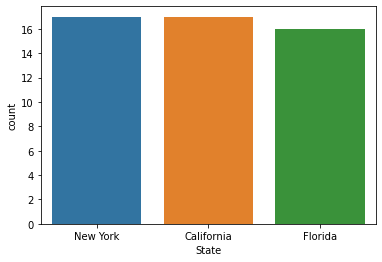

In [72]:
sns.countplot(x=df['State'])

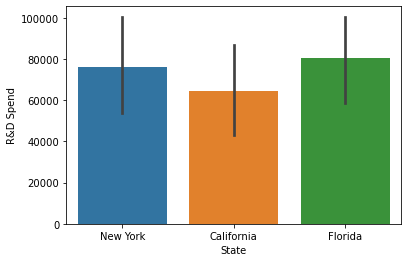

In [73]:
sns.barplot(y=df['R&D Spend'],x=df["State"])

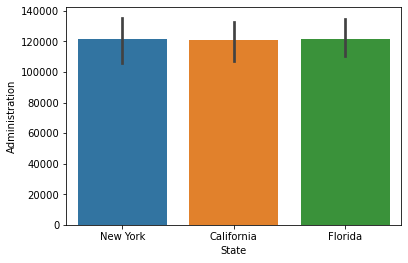

In [74]:
sns.barplot(y=df['Administration'],x=df["State"])

In [43]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [45]:
colname = []
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['State']

In [46]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for x in colname:
    df[x] = le.fit_transform(df[x])

In [47]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [48]:
x=df[["R&D Spend","Administration","Marketing Spend","State"]]
y=df["Profit"]

In [49]:
lin_model=LinearRegression()
lin_model.fit(x,y)
lin_model.score(x,y)

0.9507462044842657

In [50]:
ypred=lin_model.predict(x)

In [51]:
pd.DataFrame({"Actual":y,"Predicted":ypred})

,Actual,Predicted
0,192261.83,192502.764416
1,191792.06,189182.666045
2,191050.39,182150.958419
3,182901.99,173677.490618
4,166187.94,172142.800630
5,156991.12,163561.207958
6,156122.51,158138.912125
7,155752.60,160023.604155
8,152211.77,151721.158209
9,149759.96,154909.306740
